In [59]:
from pyDeepInsight import ImageTransformer
from pyDeepInsight.utils import Norm2Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import scanpy as sc

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
)


In [60]:
expr_file = "data/GSE85217_with_Label.csv"

# Load with pandas
df = pd.read_csv(expr_file, index_col=0)

# Separate label and numeric data
labels = df["Label"]
X = df.drop(columns=["Label"])

# Convert to AnnData
adata = ad.AnnData(X)
adata.obs["Label"] = labels.values

In [61]:
adata.obs

,Label
SampleID,
MB_SubtypeStudy_55001,SHH
MB_SubtypeStudy_55002,Group3
MB_SubtypeStudy_55003,Group4
MB_SubtypeStudy_55004,Group4
MB_SubtypeStudy_55005,Group4
MB_SubtypeStudy_55006,SHH
MB_SubtypeStudy_55007,SHH
MB_SubtypeStudy_55008,Group3
MB_SubtypeStudy_55009,Group4


In [62]:

#expr_file = "data/Normalization_Clustering_data.h5ad"
#adata = sc.read_h5ad(expr_file)
X = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
y = adata.obs["Label"].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
np.unique(y, return_counts=True)

(array(['Group3', 'Group4', 'SHH', 'WNT'], dtype=object),
 array([144, 326, 223,  70]))

In [82]:
adata.shape

(763, 21641)

In [63]:
ln = Norm2Scaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = np.unique(y_train_enc).size

In [64]:
distance_metric = 'cosine'
reducer = TSNE(
    n_components=2,
    metric=distance_metric,
    init='random',
    learning_rate='auto',
    n_jobs=-1
)

In [65]:
pixel_size = (227,227)
it = ImageTransformer(
    feature_extractor=reducer, 
    pixels=pixel_size)

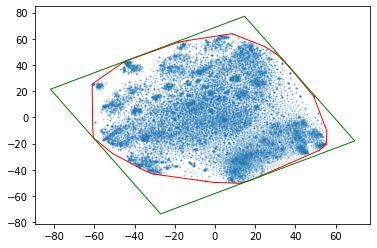

In [66]:
it.fit(X_train_norm, y=y_train, plot=True)
X_train_img = it.transform(X_train_norm)
X_test_img = it.transform(X_test_norm)

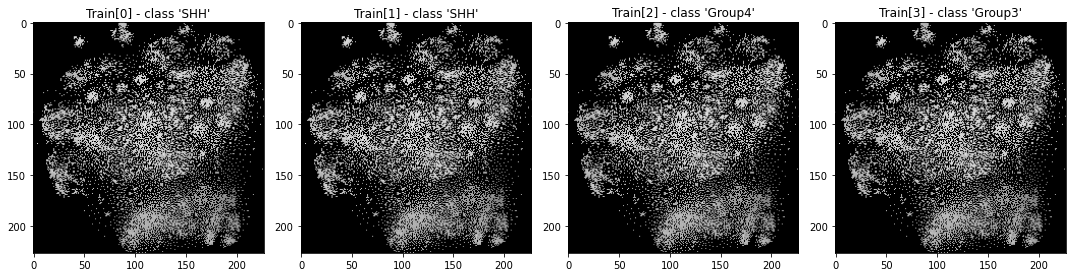

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text(f"Train[{i}] - class '{y_train[i]}'")
plt.tight_layout()

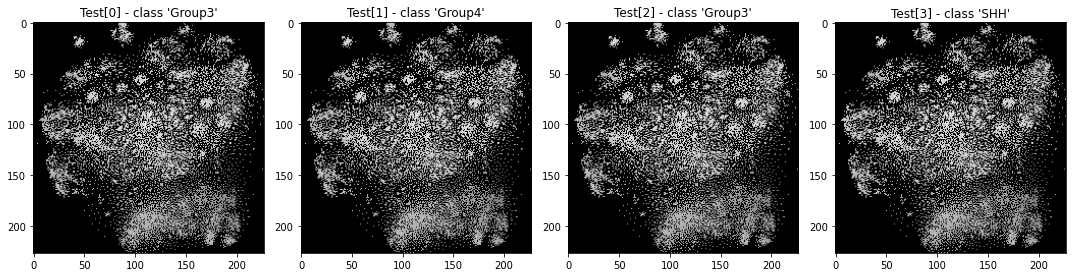

In [71]:

X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(0,4):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text(f"Test[{i}] - class '{y_test[i]}'")
plt.tight_layout()

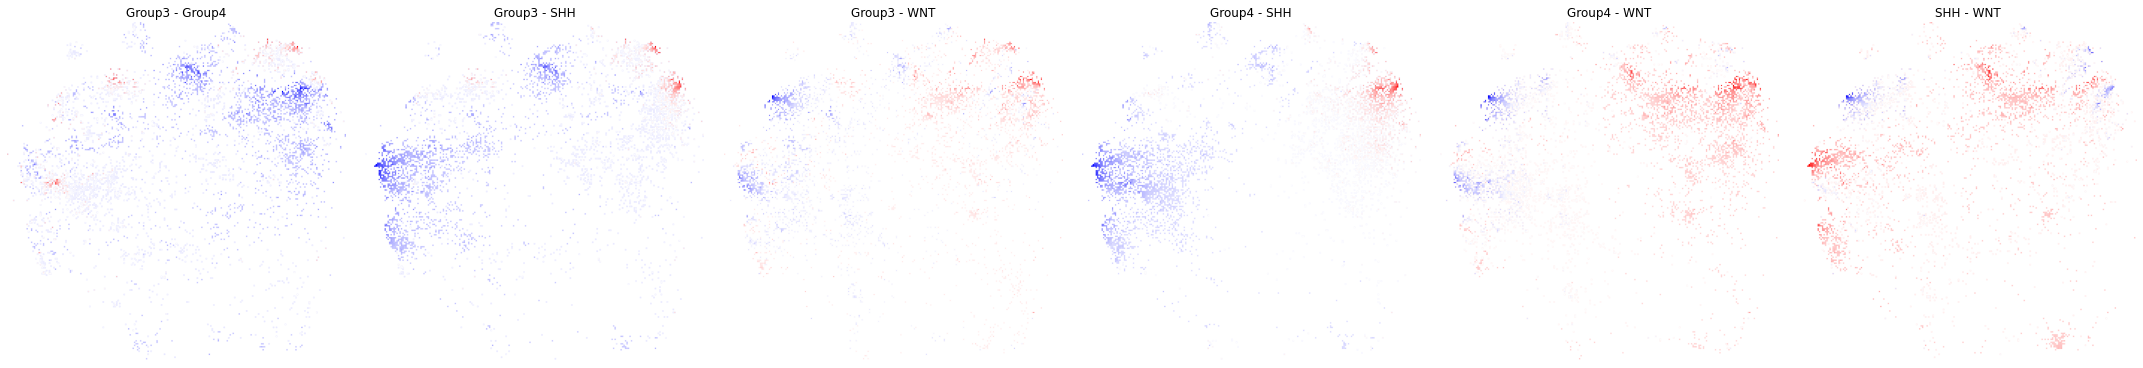

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique classes
classes = np.unique(y_train)

# Compute average image for each class (first channel only)
class_avg_images = {}
for cls in classes:
    idx = np.where(y_train == cls)[0]
    avg_img = np.mean(X_train_img[idx, :, :, 0], axis=0)  # average over samples
    class_avg_images[cls] = avg_img

# Compute difference heatmaps (pairwise differences)
pairs = [(classes[i], classes[j]) for i in range(len(classes)) for j in range(i+1, len(classes))]

# Horizontal layout
fig, axes = plt.subplots(1, len(pairs), figsize=(5*len(pairs), 5))

for ax, (cls1, cls2) in zip(axes, pairs):
    diff = class_avg_images[cls1] - class_avg_images[cls2]
    diff_norm = (diff - np.min(diff)) / (np.max(diff) - np.min(diff))

    # Plot with transparency for near-zero differences
    alpha_mask = np.abs(diff) > 0.05 * np.max(np.abs(diff))  # show only strong differences
    ax.imshow(diff_norm, cmap='bwr', alpha=alpha_mask.astype(float))
    ax.set_title(f"{cls1} - {cls2}")
    ax.axis('off')

plt.tight_layout()
plt.show()


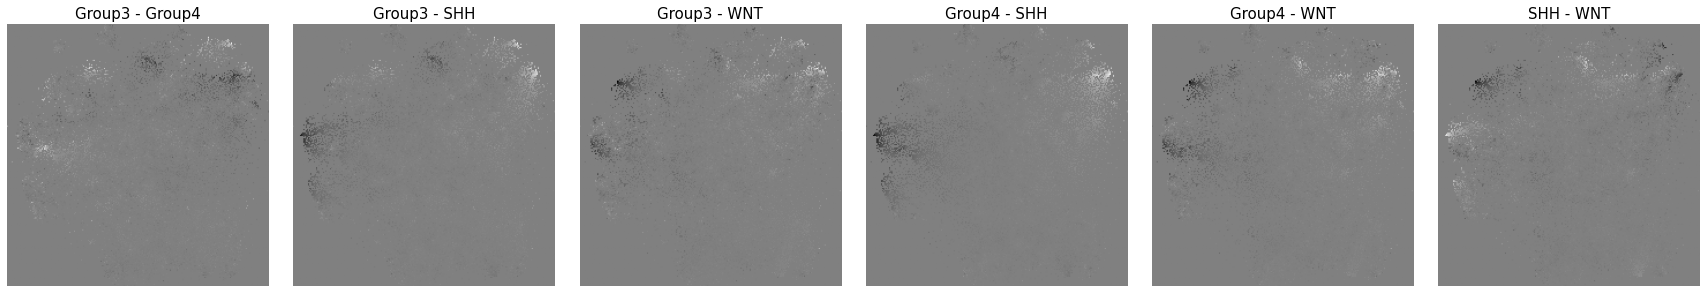

In [93]:
import numpy as np
import matplotlib.pyplot as plt

classes = np.unique(y_train)

# Average images per class
class_avg_images = {}
for cls in classes:
    idx = np.where(y_train == cls)[0]
    avg_img = np.mean(X_train_img[idx, :, :, 0], axis=0)
    class_avg_images[cls] = avg_img

# Pairs
pairs = [(classes[i], classes[j]) for i in range(len(classes)) for j in range(i+1, len(classes))]

# Plot horizontally
fig, axes = plt.subplots(1, len(pairs), figsize=(4*len(pairs), 4))

for ax, (cls1, cls2) in zip(axes, pairs):
    diff = class_avg_images[cls1] - class_avg_images[cls2]
    diff_norm = diff / np.max(np.abs(diff))  # scale to [-1, 1]
    
    # Show as grayscale (black = negative, white = positive)
    ax.imshow(diff_norm, cmap='gray', vmin=-1, vmax=1)
    ax.set_title(f"{cls1} - {cls2}", fontsize=15)
    ax.axis('off')

plt.tight_layout()
plt.show()


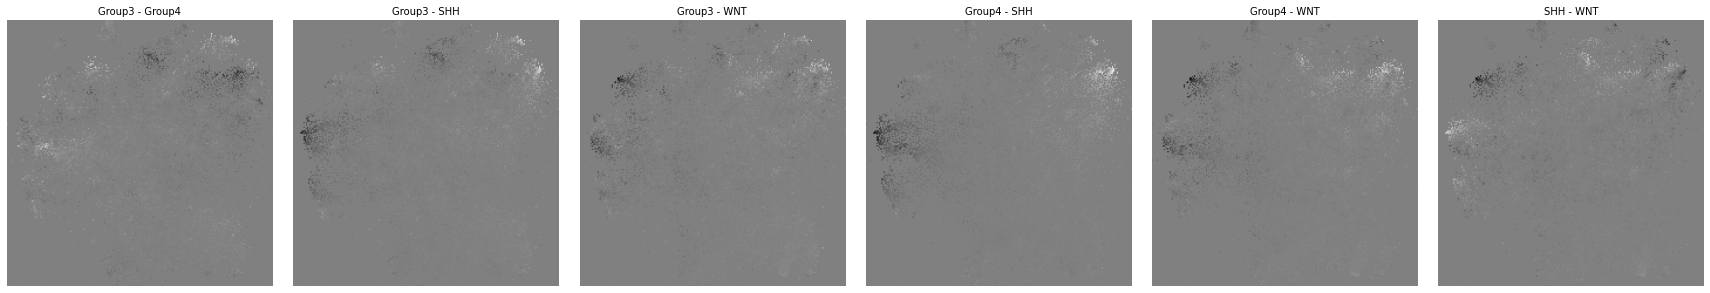

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Compute average image for each class in the test set (first channel only)
classes_test = np.unique(y_test)
class_avg_images_test = {}
for cls in classes_test:
    idx = np.where(y_test == cls)[0]
    avg_img = np.mean(X_test_img[idx, :, :, 0], axis=0)
    class_avg_images_test[cls] = avg_img

# Compute difference heatmaps (pairwise differences)
pairs_test = [(classes_test[i], classes_test[j]) for i in range(len(classes_test)) for j in range(i+1, len(classes_test))]

fig, ax = plt.subplots(1, len(pairs_test), figsize=(4*len(pairs_test), 4))
if len(pairs_test) == 1:  
    ax = [ax]  # ensure iterable

for i, (cls1, cls2) in enumerate(pairs_test):
    diff = class_avg_images_test[cls1] - class_avg_images_test[cls2]
    diff_norm = diff / np.max(np.abs(diff))  # normalize to [-1, 1]
    ax[i].imshow(diff_norm, cmap='gray', vmin=-1, vmax=1)
    ax[i].set_title(f"{cls1} - {cls2}", fontsize=10)
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [95]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [96]:
model = torchvision.models.squeezenet1_1(weights='DEFAULT')
model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2)  # Modify input layer for 1 channel
model.classifier.append(nn.Flatten())
_ = model.classifier.append(nn.Linear(1000, num_classes))


In [97]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x[:1])  # ensure single channel
])



In [98]:
y_train_tensor = torch.from_numpy(le.transform(y_train)).long()
y_test_tensor = torch.from_numpy(le.transform(y_test)).long()


In [99]:
# Define custom Dataset
from torch.utils.data import Dataset, DataLoader

class DeepInsightDataset(Dataset):
    def __init__(self, images, labels, transform):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.transform(self.images[idx]).float()  # <-- force float32
        label = self.labels[idx]
        return img, label

# Create datasets and loaders
train_dataset = DeepInsightDataset(X_train_img, y_train_tensor, preprocess)
test_dataset = DeepInsightDataset(X_test_img, y_test_tensor, preprocess)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)




In [100]:
batch_size = 200

train_dataset = DeepInsightDataset(X_train_img, y_train_tensor, preprocess)
test_dataset = DeepInsightDataset(X_test_img, y_test_tensor, preprocess)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [101]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-04,
    #momentum=0.8,
    weight_decay=1e-05
)

In [102]:
model.train()
model.to(device)
for epoch in range(100):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch statistics
    if not (epoch % 20):
        print(f'[{epoch}] loss: {running_loss / len(train_dataset) * batch_size:.3f}')
print(f'[{epoch}] loss: {running_loss / len(train_dataset) * batch_size:.3f}')


[0] loss: 1.784
[20] loss: 1.717
[40] loss: 1.591
[60] loss: 0.828
[80] loss: 0.455
[99] loss: 0.266


In [103]:
model.to('cpu')
model = model.eval()

In [104]:
train_predicted = []
y_true_train = []

with torch.no_grad():
    for inputs, labels in trainloader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        train_predicted.append(preds)
        y_true_train.append(labels)

train_predicted = torch.cat(train_predicted)
y_true_train = torch.cat(y_true_train)

# Accuracy
train_accuracy = accuracy_score(y_true_train.numpy(), train_predicted.numpy())
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8639344262295082


In [105]:
test_predicted = []
y_true_test = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        test_predicted.append(preds)
        y_true_test.append(labels)

test_predicted = torch.cat(test_predicted)
y_true_test = torch.cat(y_true_test)


In [106]:
import torch.nn.functional as F
probs_test = []

with torch.no_grad():
    for inputs, _ in testloader:
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        probs_test.append(probs)

probs_test = torch.cat(probs_test).numpy()


Training Accuracy: 0.8639
Test Accuracy: 0.8562
Precision (Macro): 0.8995
Precision (Micro): 0.8562
Precision (Weighted): 0.8750
Recall (Macro): 0.8165
Recall (Micro): 0.8562
Recall (Weighted): 0.8562
F1-score (Macro): 0.8177
F1-score (Micro): 0.8562
F1-score (Weighted): 0.8315
ROC-AUC (OvO, Macro): 0.9903
ROC-AUC (OvO, Weighted): 0.9897
ROC-AUC (OvR, Macro): 0.9903
ROC-AUC (OvR, Weighted): 0.9897

Classification Report:
              precision    recall  f1-score   support

      Group3       0.90      0.31      0.46        29
      Group4       0.76      1.00      0.87        65
         SHH       1.00      0.96      0.98        45
         WNT       0.93      1.00      0.97        14

    accuracy                           0.86       153
   macro avg       0.90      0.82      0.82       153
weighted avg       0.87      0.86      0.83       153



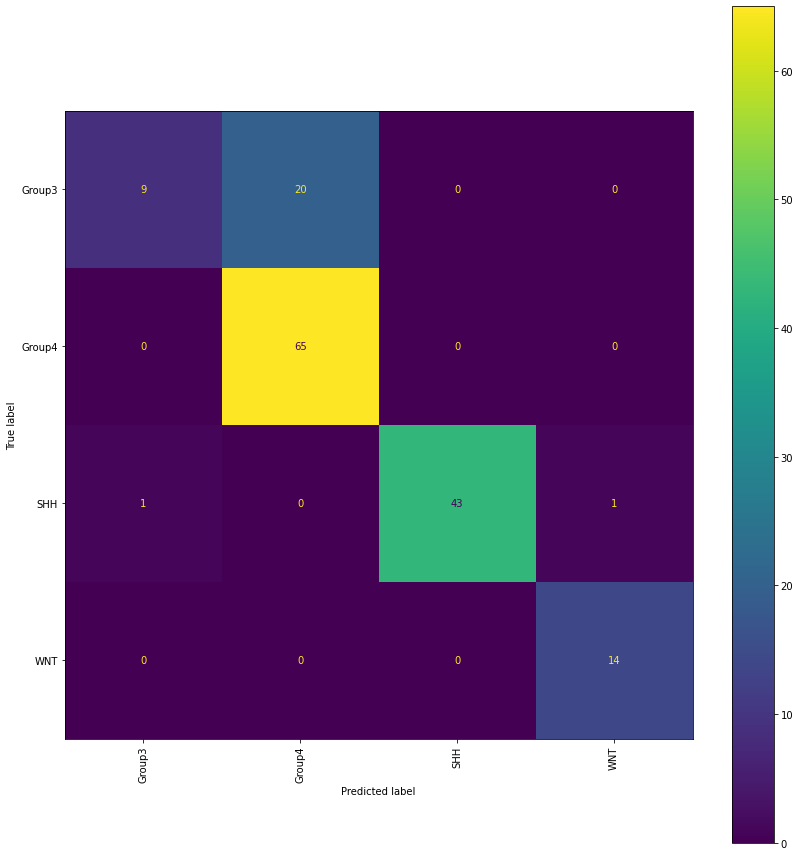

In [107]:


# === Metrics ===
y_true = y_test_tensor.cpu().numpy()
y_pred = test_predicted.cpu().numpy()
y_true_onehot = label_binarize(y_true, classes=np.arange(num_classes))

precision_macro = precision_score(y_true, y_pred, average='macro')
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

recall_macro = recall_score(y_true, y_pred, average='macro')
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

roc_auc_ovo_macro = roc_auc_score(y_true_onehot, probs_test, multi_class='ovo', average='macro')
roc_auc_ovo_weighted = roc_auc_score(y_true_onehot, probs_test, multi_class='ovo', average='weighted')
roc_auc_ovr_macro = roc_auc_score(y_true_onehot, probs_test, multi_class='ovr', average='macro')
roc_auc_ovr_weighted = roc_auc_score(y_true_onehot, probs_test, multi_class='ovr', average='weighted')

train_accuracy = accuracy_score(y_true_train.numpy(), train_predicted.numpy())
test_accuracy = accuracy_score(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=le.classes_)

# === Print Results ===
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")
print(f"F1-score (Macro): {f1_macro:.4f}")
print(f"F1-score (Micro): {f1_micro:.4f}")
print(f"F1-score (Weighted): {f1_weighted:.4f}")
print(f"ROC-AUC (OvO, Macro): {roc_auc_ovo_macro:.4f}")
print(f"ROC-AUC (OvO, Weighted): {roc_auc_ovo_weighted:.4f}")
print(f"ROC-AUC (OvR, Macro): {roc_auc_ovr_macro:.4f}")
print(f"ROC-AUC (OvR, Weighted): {roc_auc_ovr_weighted:.4f}")
print("\nClassification Report:")
print(report)

fig, ax = plt.subplots(figsize=(12, 12))  # Make it large
disp = ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, display_labels=le.classes_, ax=ax, xticks_rotation=90
)
plt.tight_layout()
plt.show()